In [1]:
# general 
import pandas as pd 
import numpy as np 
from datetime import datetime

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:

flights = sns.load_dataset("flights")
flights['report_date'] = flights.apply(lambda x: datetime.strptime(f"{x['year']}-{x['month']}", '%Y-%b').date(), axis=1)
flights.head()

,year,month,passengers,report_date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [3]:
flights.dtypes

year              int64
month          category
passengers        int64
report_date      object
dtype: object

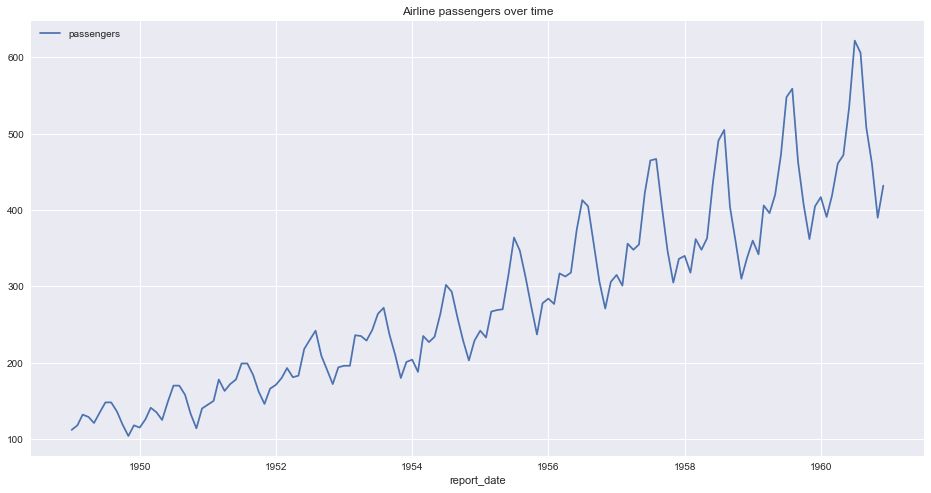

In [4]:
flights.plot(x='report_date', 
             y='passengers', 
             title='Airline passengers over time');

In [7]:
pd.options.plotting.backend = "plotly"

In [9]:
flights.plot(x='report_date', 
             y='passengers', 
             title='Airline passengers over time')

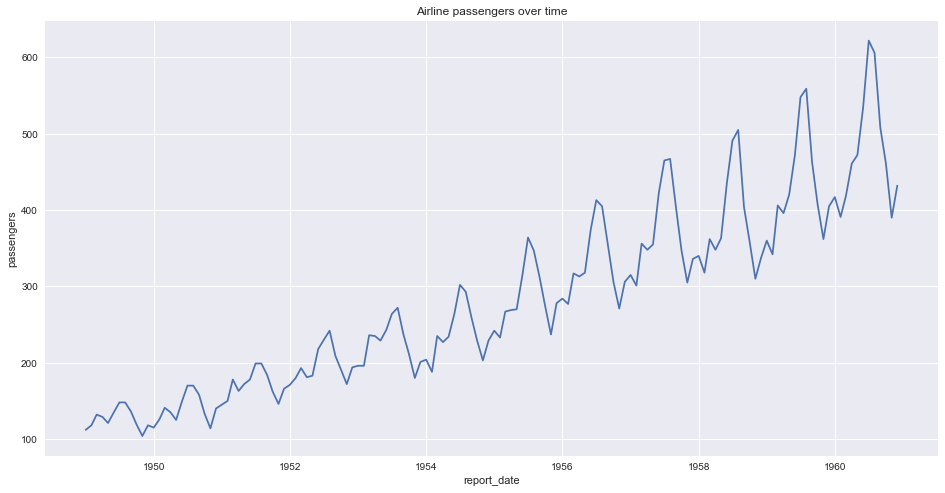

In [10]:

sns.lineplot(data=flights, 
             x='report_date', 
             y='passengers').set_title('Airline passengers over time');

In [12]:
flights

,year,month,passengers,report_date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01
...,...,...,...,...
139,1960,Aug,606,1960-08-01
140,1960,Sep,508,1960-09-01
141,1960,Oct,461,1960-10-01
142,1960,Nov,390,1960-11-01


## Seasonal


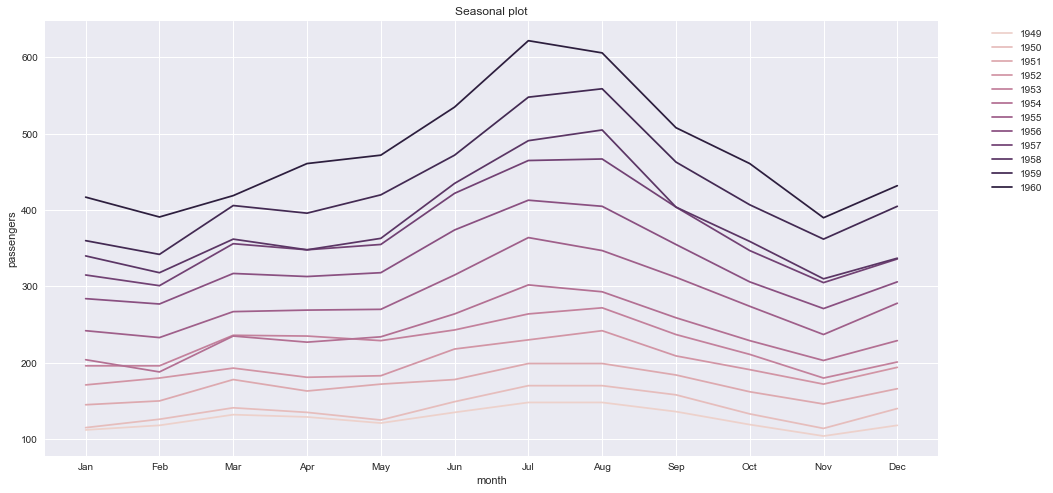

In [11]:
sns.lineplot(data=flights, 
             x='month', 
             y='passengers', 
             hue='year', 
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

In [13]:
fig = px.line_polar(flights, r='passengers', theta='month', 
                    color='year', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

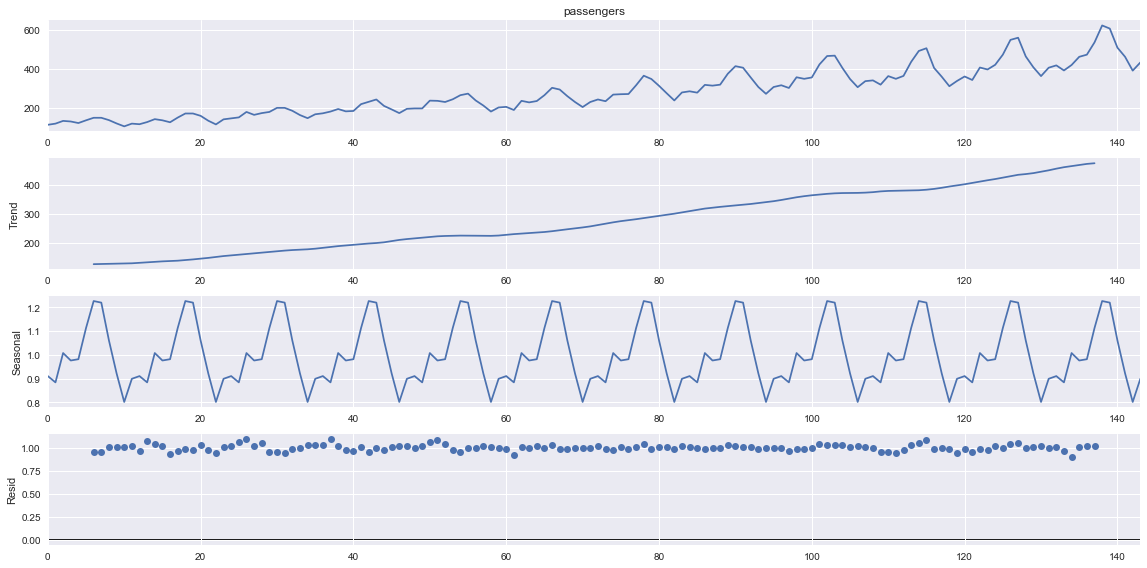

In [14]:
decomposition = seasonal_decompose(flights['passengers'], 
                                   model='multiplicative', 
                                   period=12)
decomposition.plot();